Importing the libraries

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [68]:
df = pd.read_csv("wine_data.csv")

In [69]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [70]:
df.shape

(1599, 12)

In [71]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [72]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [73]:
# checking for missing values in dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So, no missing values in the dataset

In [74]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Separating features and target

In [75]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [76]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [77]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

Data Analysis and Visualization

In [78]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


<Axes: xlabel='quality', ylabel='count'>

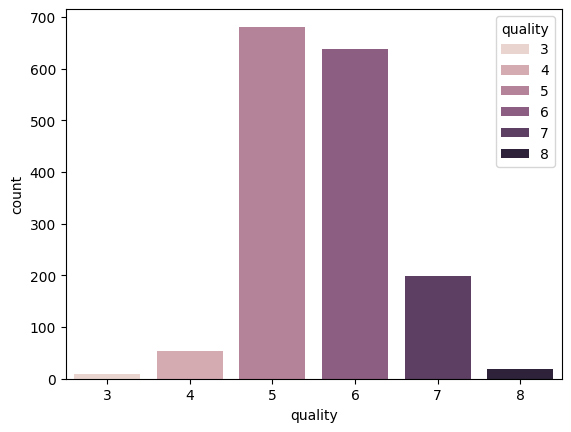

In [79]:
sns.countplot(df, x='quality', hue='quality')

<Axes: xlabel='quality', ylabel='volatile acidity'>

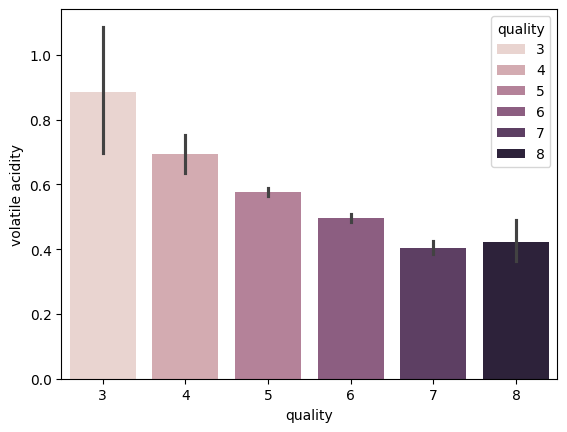

In [80]:
# volatile acidity vs quality
sns.barplot(df, y='volatile acidity', x='quality', hue='quality')

<Axes: xlabel='quality', ylabel='citric acid'>

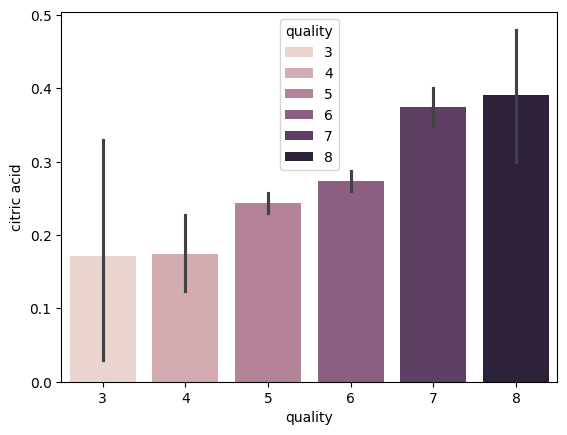

In [81]:
  # citric acid vs quality
  sns.barplot(df, y='citric acid', x='quality', hue='quality')

Correlation

1. Positive Correlation
2. Negative Correlation

In [82]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

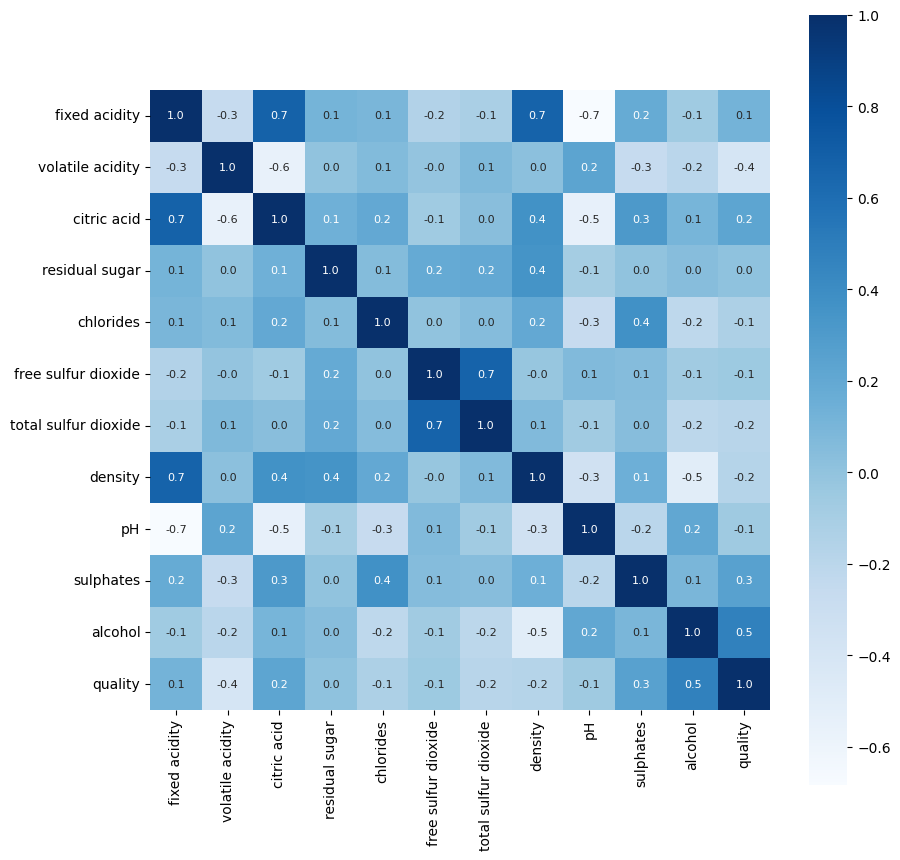

In [83]:
# heatmap to understand correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues', square=True)

Train-Test split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [85]:
X_train.shape

(1279, 11)

In [86]:
X_test.shape

(320, 11)

In [87]:
y_train.shape

(1279,)

In [88]:
y_test.shape

(320,)

In [89]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.333620,0.529644,0.269977,2.549883,0.088265,15.553557,45.804926,0.996786,3.312729,0.660571,10.425606
std,1.760796,0.175868,0.197459,1.455277,0.050175,10.295101,32.641105,0.001902,0.155097,0.170682,1.051542
min,4.600000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990640,2.740000,0.370000,8.400000
25%,7.100000,0.400000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.530000,0.260000,2.200000,0.079000,13.000000,37.000000,0.996800,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.425000,2.600000,0.090000,21.000000,61.000000,0.997875,3.400000,0.730000,11.100000
max,15.600000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.000000


In [90]:
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,8.263750,0.520531,0.274969,2.494531,0.084275,17.159375,49.117188,0.996591,3.304656,0.648469,10.412500
std,1.661513,0.191402,0.184039,1.212898,0.031587,11.018774,33.814766,0.001820,0.151579,0.164631,1.122001
min,5.000000,0.160000,0.000000,0.900000,0.039000,1.000000,7.000000,0.990070,2.880000,0.330000,9.000000
25%,7.100000,0.390000,0.120000,1.900000,0.071000,8.000000,24.000000,0.995600,3.207500,0.550000,9.500000
50%,7.900000,0.500000,0.250000,2.200000,0.079000,15.000000,39.000000,0.996655,3.310000,0.610000,10.100000
75%,9.200000,0.630000,0.420000,2.600000,0.090250,24.000000,66.250000,0.997800,3.400000,0.710000,11.025000
max,15.900000,1.580000,0.740000,11.000000,0.387000,68.000000,151.000000,1.001500,4.010000,1.950000,14.900000


In [91]:
# applying standard scaling on the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [92]:
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [93]:
X_train_new.shape

(1279, 11)

In [94]:
X_test_new.shape

(320, 11)

In [95]:
features = scaler.get_feature_names_out()

In [96]:
X_train_df = pd.DataFrame(X_train_new, columns=features)
X_test_df = pd.DataFrame(X_test_new, columns=features)

In [97]:
X_train_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.303175,1.623191,-1.317128,0.034452,-0.284415,3.152872,1.354500,-0.302625,0.433905,-0.237790,0.356182
1,-2.121245,-0.054859,-0.607841,-0.309260,-0.683173,-0.733991,0.588294,-1.780246,3.787947,-0.589458,2.544303
2,-0.644063,2.675528,-1.367791,0.309421,0.273846,-0.831163,-0.913467,-0.486671,0.756409,-1.175571,-0.404903
3,-0.473619,-0.054859,0.760069,-0.171775,-0.025222,-0.733991,-0.239207,0.217960,1.723921,-0.296402,0.070775
4,-0.928137,1.310334,-1.266464,-0.515487,-0.204664,-0.928334,-1.036060,-0.413052,1.530419,-0.179179,-0.452471
...,...,...,...,...,...,...,...,...,...,...,...
1274,-1.155395,-0.794339,-0.557178,-0.790456,-0.164788,-0.442476,-0.698930,-0.675974,0.175902,-0.589458,-1.070853
1275,-0.189545,0.343322,-1.114474,-0.378002,0.014653,-0.345305,-0.423096,0.296837,0.304904,-0.296402,-0.404903
1276,-1.496284,0.400205,-1.367791,-0.790456,-0.503732,-0.442476,-0.852171,-2.563753,0.885411,-0.589458,1.688082
1277,-0.644063,-0.964989,0.962722,-0.309260,-0.284415,0.820754,-0.055318,-0.760109,0.562907,1.110269,0.546454


In [98]:
X_test_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.871322,-0.225509,-0.253198,-0.171775,-0.344229,-0.248133,-0.668282,-1.264919,0.627408,0.993047,0.831861
1,-0.644063,-0.680573,0.152109,-0.309260,-0.104974,1.889641,0.802832,0.112791,0.820910,-0.823903,-0.975717
2,-1.553098,-0.168626,-0.911821,-0.171775,-0.782863,0.140553,1.630333,-1.622493,2.046425,-0.179179,2.449167
3,0.662675,-0.794339,0.709405,4.365218,-0.384105,0.237725,-0.208559,0.948883,-0.146602,0.875824,0.451318
4,-0.700878,-0.396158,-0.354524,-0.446745,-0.224602,1.209440,0.251164,-0.623390,0.369405,-0.120568,-0.024360
...,...,...,...,...,...,...,...,...,...,...,...
315,-0.928137,-0.396158,-0.151871,-0.584229,-0.224602,0.237725,-0.361800,-1.044065,0.498406,-0.355013,0.165911
316,-0.587248,-0.282392,0.253435,-0.309260,-0.523670,1.500955,0.251164,0.260027,-0.082101,-0.061957,-0.404903
317,-0.814507,0.570854,-1.317128,-0.103033,-0.244539,-0.150962,-0.208559,-0.823211,0.175902,-0.765292,0.356182
318,-0.019101,-1.249404,0.608079,-0.103033,-0.204664,0.140553,-0.085966,-1.233369,-0.017600,0.641379,1.973489


In [99]:
X_train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-5.499901e-16,-1.111091e-16,-2.499955e-17,-7.013762e-17,2.416623e-16,-1.527750e-17,9.722047e-18,-2.354958e-14,3.134666e-15,6.666546e-17,-5.749896e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.121245e+00,-2.330182e+00,-1.367791e+00,-9.279408e-01,-1.520565e+00,-1.414192e+00,-1.219949e+00,-3.231575e+00,-3.694146e+00,-1.703073e+00,-1.927074e+00
25%,-7.008777e-01,-7.374564e-01,-9.118212e-01,-4.467445e-01,-3.641669e-01,-8.311626e-01,-7.295781e-01,-6.233900e-01,-6.626084e-01,-6.480695e-01,-8.805814e-01
50%,-2.463600e-01,2.023596e-03,-5.054450e-02,-2.405175e-01,-1.847257e-01,-2.481332e-01,-2.698551e-01,7.622472e-03,-1.760030e-02,-2.377904e-01,-2.146317e-01
75%,4.922313e-01,6.277374e-01,7.854005e-01,3.445178e-02,3.459126e-02,5.292394e-01,4.657017e-01,5.729044e-01,5.629070e-01,4.069337e-01,6.415893e-01
max,4.128373e+00,4.552669e+00,3.698542e+00,8.902212e+00,1.042224e+01,5.484990e+00,7.453492e+00,3.630686e+00,4.497456e+00,7.850567e+00,3.400524e+00


In [100]:
X_test_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,-0.039696,-0.051838,0.025292,-0.038050,-0.079553,0.156040,0.101515,-0.102016,-0.052068,-0.070931,-0.012468
std,0.943984,1.088753,0.932401,0.833774,0.629776,1.070712,1.036362,0.957194,0.977694,0.964922,1.067423
min,-1.893987,-2.102650,-1.367791,-1.134168,-0.982242,-1.414192,-1.189301,-3.531306,-2.791135,-1.937518,-1.356260
25%,-0.700878,-0.794339,-0.759831,-0.446745,-0.344229,-0.733991,-0.668282,-0.623390,-0.678734,-0.648069,-0.880581
50%,-0.246360,-0.168626,-0.101208,-0.240518,-0.184726,-0.053790,-0.208559,-0.068625,-0.017600,-0.296402,-0.309767
75%,0.492231,0.570854,0.760069,0.034452,0.039576,0.820754,0.626605,0.533466,0.562907,0.289711,0.570238
max,4.298817,5.974746,2.381295,5.808807,5.956150,5.096303,3.224040,2.479088,4.497456,7.557511,4.256745


Custom Label Binarization (target)

In [101]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [102]:
# labels <= 5 (3,4,5) coded as 0 (bad quality)
# labels > 5 (6,7,8) coded as 1 (good quality)

def Binarize(label):
  if (label>5):
    return 1
  return 0

In [103]:
for i in y_train.index:
  y_train[i] = Binarize(y_train[i])

In [104]:
y_train.value_counts()

quality
1    684
0    595
Name: count, dtype: int64

In [105]:
for i in y_test.index:
  y_test[i] = Binarize(y_test[i])

In [106]:
y_test.value_counts()

quality
1    171
0    149
Name: count, dtype: int64

In [107]:
X_train_new

array([[-0.30317467,  1.62319119, -1.31712781, ...,  0.43390534,
        -0.23779044,  0.35618228],
       [-2.12124546, -0.05485948, -0.60784116, ...,  3.78794723,
        -0.58945817,  2.54430257],
       [-0.64406295,  2.67552805, -1.36779114, ...,  0.75640937,
        -1.17557106, -0.40490304],
       ...,
       [-1.49628363,  0.40020511, -1.36779114, ...,  0.88541098,
        -0.58945817,  1.68808159],
       [-0.64406295, -0.96498865,  0.96272215, ...,  0.56290695,
         1.11026919,  0.54645361],
       [-1.55309834,  1.82228195, -1.11447448, ...,  1.59491984,
         0.93443533,  2.35403124]])

In [108]:
y_train.to_numpy()

array([0, 0, 0, ..., 1, 1, 1])

Model Training (Random Forest Classifier)

In [109]:
rfc = RandomForestClassifier()

In [110]:
rfc.fit(X_train_new, y_train.to_numpy())

RandomForestClassifier()

In [111]:
y_pred = rfc.predict(X_test_new)

In [112]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [113]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

Model Evaluation

In [114]:
accuracy_score(y_test, y_pred)

0.853125

Building a predictive system

In [115]:
input_data = [8.9,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2]
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)

In [116]:
rfc.predict(input_data)

array([0])

Predicted output: <=5 (bad quality wine)<br>
Actual output: 5 i.e. <=5 (bad quality wine)

In [119]:
input_data2 = [8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5]
input_data2 = np.asarray(input_data2)
input_data2 = input_data2.reshape(1,-1)

In [120]:
rfc.predict(input_data2)

array([1])

Predicted output: >5 (good quality wine)<br>
Actual output: 7 i.e. >5 (good quality wine)